In [14]:
import numpy as np
import sys
sys.path.append('../scripts/')
import RenormGroupFunctions as rg
import rgFlow as flow

Functions for (Visualizing LFC Coefficient Sink, LFC_coefficients)

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.special import eval_legendre
from numpy import pi

def sink_2d(gamma, lfc):
    val = 0
    for l in range(len(lfc)):
        val += lfc[l]*eval_legendre(l,np.cos(gamma))
    return val

def visualize_lfc(lfc) -> None:
    plt.rcParams['font.size'] = 20
    plt.rcParams['axes.linewidth'] = 1.5


    fig, axs = plt.subplots(1,1,figsize=(12,8),dpi=72)
    for e in ['x', 'y']:
        axs.tick_params(axis=e,which='major',size=8,width=1,direction='in',top='on',right='on')

    x = np.arange(len(lfc))
    axs.scatter(x, lfc, color='mediumblue')

    axs.set_xlabel('LFC No', fontsize='xx-large')
    axs.set_ylabel('LFC Value', fontsize='xx-large')

def visualize_sink_2d(lfc, x_normalized=False) -> None:

    plt.rcParams['font.size'] = 20
    plt.rcParams['axes.linewidth'] = 1.5
    plt.rcParams['xtick.major.pad'] = 8
    plt.rcParams['ytick.major.pad'] = 8
    mpl.rcParams['mathtext.fontset'] = 'cm'

    fig, axs = plt.subplots(1,1,figsize=(12,8),dpi=72)
    for e in ['x', 'y']:
        axs.tick_params(axis=e,which='major',size=8,width=1,direction='in',top='on',right='on')

    gamma = np.linspace(-2*pi, 2*pi, 1000)

    if x_normalized:
        x_label, y_label = r'$\frac{\gamma}{\pi}$', r'$u(\gamma)$'
        axs.plot(gamma/pi, sink_2d(gamma,lfc), color='mediumblue')
    else:
        x_label, y_label = r'$\gamma$', r'$u(\gamma)$'
        axs.plot(gamma, sink_2d(gamma,lfc))
    axs.set_xlabel(x_label, fontsize='xx-large')
    axs.set_ylabel(y_label, fontsize='xx-large')
    

Visualize Phase Diagram 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


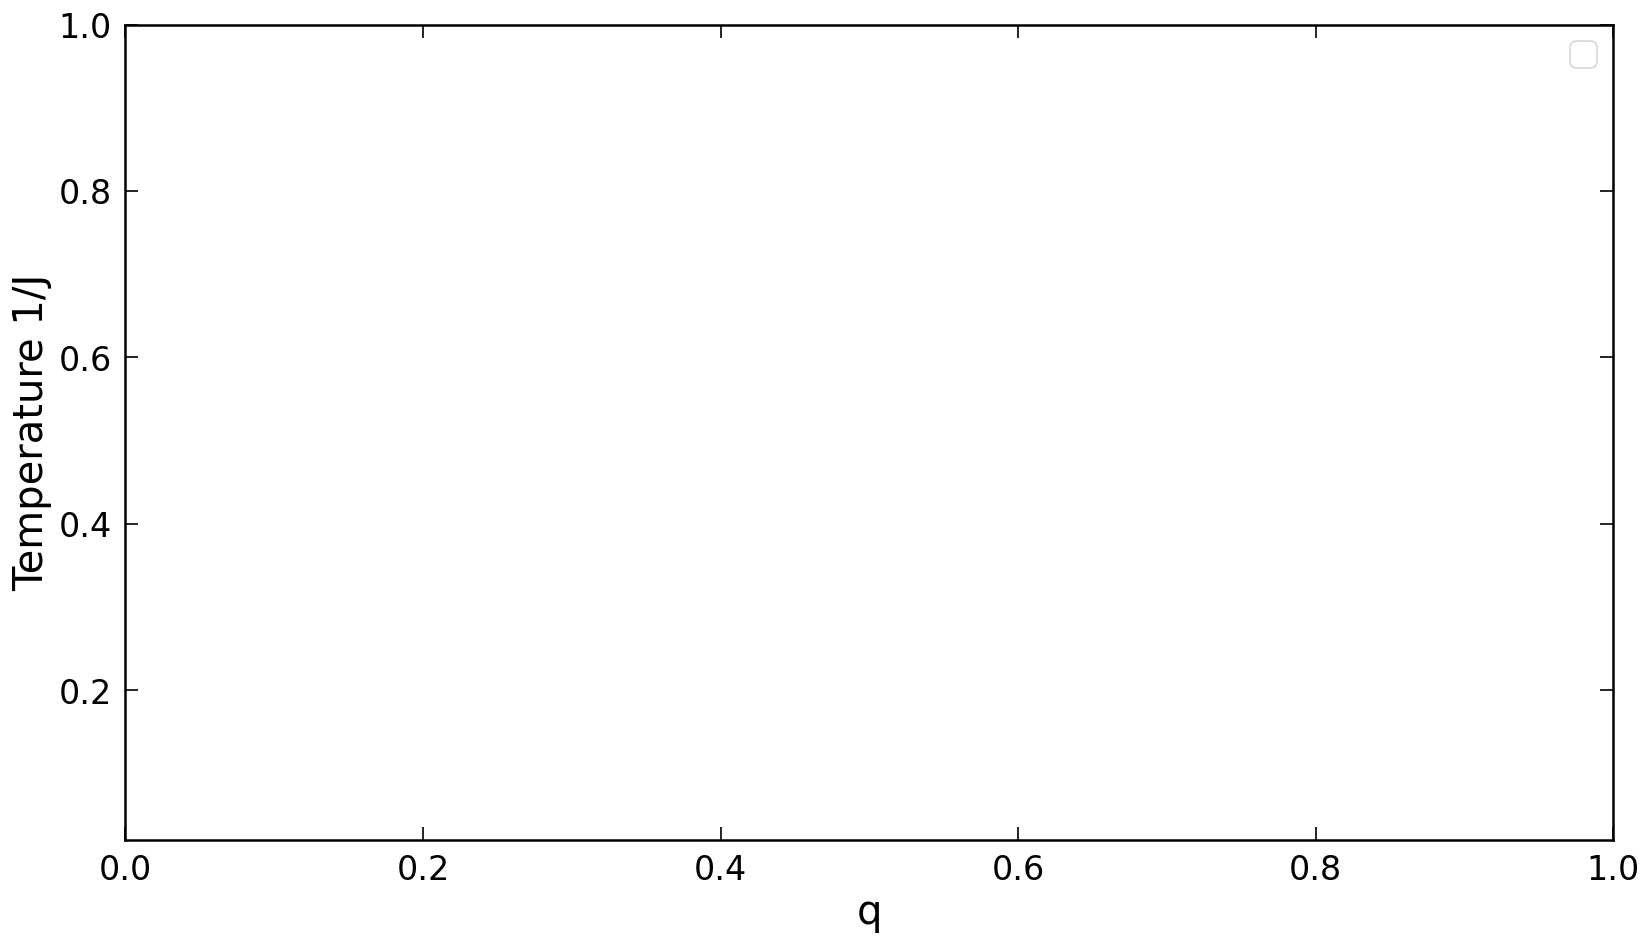

In [17]:
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 1.5

plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8

fig, axs = plt.subplots(1,1,figsize=(16,9),dpi=120,)
for e in ['x', 'y']:
    axs.tick_params(axis=e,which='major',size=8,width=1,direction='in',top='on',right='on')

axs.set_ylabel(r'Temperature 1/J', fontsize='large')
axs.set_xlabel('q', fontsize='large')

axs.set_xlim(0,1)
axs.set_ylim(0.02,1)

plt.legend(loc='upper right')

Flow Test

In [ ]:
f = flow.rgTrajectory(J=25, p=0.5, q=0.5, n=9, dim=3, pool_size=30000, l_prec=21, rg_step=25)